In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.config import list_physical_devices
from tensorflow.config.experimental import set_memory_growth

import cv2
from tensorflow import device
import matplotlib.pyplot as plt #Для отрисовки графиков

In [2]:
set_memory_growth(list_physical_devices('GPU')[0], True)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = cv2.bitwise_not(x_train.reshape(x_train.shape[0], 28, 28, 1))
x_test = cv2.bitwise_not(x_test.reshape(x_test.shape[0], 28, 28, 1))

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       1

In [7]:
dataGen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
                             shear_range=0.05,zoom_range=[0.95, 1.05],validation_split=0.2)
dataGen.fit(x_train)

train_generator = dataGen.flow(x_train, y_train, batch_size=128, shuffle=True, 
                               seed=2, save_to_dir=None, subset='training')

In [8]:
with device('/CPU:0'):
    history = model.fit(train_generator,
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/15
375/375 [==============================] - 166s 440ms/step - loss: 0.3336 - accuracy: 0.9044 - val_loss: 0.0801 - val_accuracy: 0.9740
Epoch 2/15
375/375 [==============================] - 166s 443ms/step - loss: 0.1090 - accuracy: 0.9670 - val_loss: 0.0784 - val_accuracy: 0.9755
Epoch 3/15
375/375 [==============================] - 167s 446ms/step - loss: 0.0815 - accuracy: 0.9763 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 4/15
375/375 [==============================] - 168s 448ms/step - loss: 0.0710 - accuracy: 0.9797 - val_loss: 0.0326 - val_accuracy: 0.9894
Epoch 5/15
375/375 [==============================] - 167s 446ms/step - loss: 0.0650 - accuracy: 0.9808 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 6/15
375/375 [==============================] - 168s 447ms/step - loss: 0.0575 - accuracy: 0.9835 - val_loss: 0.0300 - val_accuracy: 0.9906
Epoch 7/15
375/375 [==============================] - 169s 451ms/step - loss: 0.0512 - accuracy: 0.9854 - val_loss: 0.0605 -

In [9]:
model.save('ConvRecognition.keras')

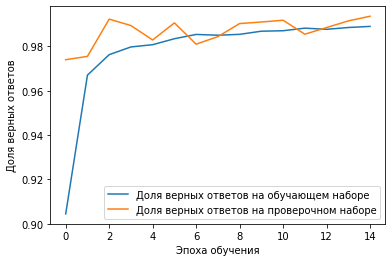

In [10]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()